In [13]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:e}'.format
from matplotlib import rcParams

from matplotlib.ticker import ScalarFormatter
from lmfit.models import GaussianModel
from lmfit.models import LinearModel

PALETTE = ['#1b6872', '#df208a', '#efb475', '#aec5fb', '#D5A6E6', '#A4D4B4', '#FFD166', '#FF6F61']

def read_xps_avg(file_path, encoding='ISO-8859-1'):
    """
    Reads XPS data from a .avg file, skipping metadata and extracting energy and intensity data.

    Parameters:
    - file_path (str): The path to the .avg file.
    - encoding (str): The file encoding (default: 'ISO-8859-1').

    Returns:
    - df (pandas.DataFrame): DataFrame containing the energy and intensity data.
    """
    data = []
    energy_start = None
    energy_step = None
    energy_count = None
    with open(file_path, encoding=encoding) as file:
        for line in file:
            # Extract energy axis info from $SPACEAXES
            if line.startswith("$SPACEAXES"):
                # Read next lines to get start, step, and number of points
                next(file)  # Skip to the next line
                energy_info = next(file).split(',')
                energy_start = float(energy_info[0].split('=')[1].strip())
                energy_step = float(energy_info[1].strip())
                energy_count = int(energy_info[2].strip())
            
            # Skip lines that are metadata or comments
            if line.startswith(';') or line.startswith('$'):
                continue

            # Use regex to extract numerical data from lines starting with 'LIST@'
            if line.startswith('LIST@'):
                # Extract the numerical values (ignoring the LIST@ part)
                values = re.findall(r"[-+]?\d*\.\d+|\d+", line)
                # Convert values to floats and append them to the data
                data.extend([float(value) for value in values])

    # Clean the data: remove the interspersed row indices (multiples of 4)
    cleaned_data = [value for i, value in enumerate(data) if (i + 1) % 5 != 0]

    # Generate the energy values assuming a linear scale
    energy_values = [energy_start + i * energy_step for i in range(len(cleaned_data))]

    # Create a DataFrame with energy and intensity values
    df = pd.DataFrame({
        'Energy (eV)': energy_values,
        'Intensity': cleaned_data
    })

    return df

# Survey:

In [14]:
labels = ['Cisteamina SAM', 'Cisteamina + Proteína', 'Adsorção Direta (DAP)', 'Branco']

survey_data = []
# Example usage
for i in range(1,5):
    file_path = f'XPS/{i}/XPS Survey.avg'  # Change this to your .avg file path
    # Example usage
    survey_data.append(read_xps_avg(file_path))

[ 136  137  138 ... 1493 1494 1495]
[1350.680054 1349.680054 1348.680054 ...   -6.319946   -7.319946
   -8.319946]


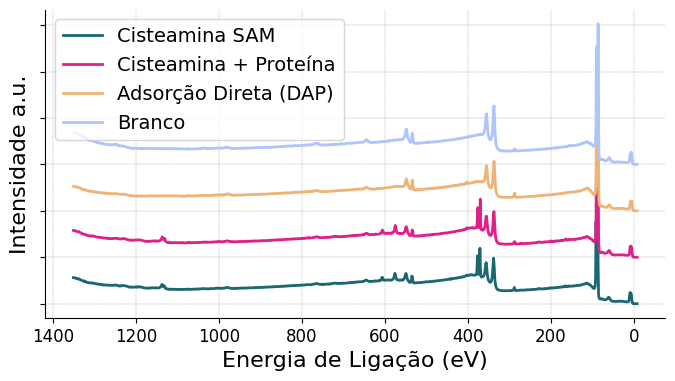

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharey = False)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(12)

ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
ax.invert_xaxis()
ax.set_xlabel('Energia de Ligação (eV)', fontsize=16)
ax.set_ylabel('Intensidade a.u.', fontsize=16)
ax.tick_params(labelsize = 12)
ax.set_yticklabels([])

x = np.array(list(range(136,136+1360)))
print(x)
x = 1486.680054 - x
print(x)

for i, xps_data in enumerate(survey_data):
    ax.plot(x, xps_data['Intensity'][-1360:] + i*1e5, color = PALETTE[i], label = labels[i], linewidth = 2)
ax.legend(fontsize = 14)


# GOLD

[ 136  137  138 ... 1493 1494 1495]
[1350.680054 1349.680054 1348.680054 ...   -6.319946   -7.319946
   -8.319946]
Name             Value      Min      Max     Vary     Expr
p1_amplitude         1     -inf      inf     True     None
p1_center            0     -inf      inf     True     None
p1_fwhm          2.355     -inf      inf    False 2.3548200*p1_sigma
p1_height       0.3989     -inf      inf    False 0.3989423*p1_amplitude/max(1e-15, p1_sigma)
p1_sigma             1        0      inf     True     None
Name             Value      Min      Max     Vary     Expr
p2_amplitude         1     -inf      inf     True     None
p2_center            0     -inf      inf     True     None
p2_fwhm          2.355     -inf      inf    False 2.3548200*p2_sigma
p2_height       0.3989     -inf      inf    False 0.3989423*p2_amplitude/max(1e-15, p2_sigma)
p2_sigma             1        0      inf     True     None
Name             Value      Min      Max     Vary     Expr
p1_amplitude         1     -

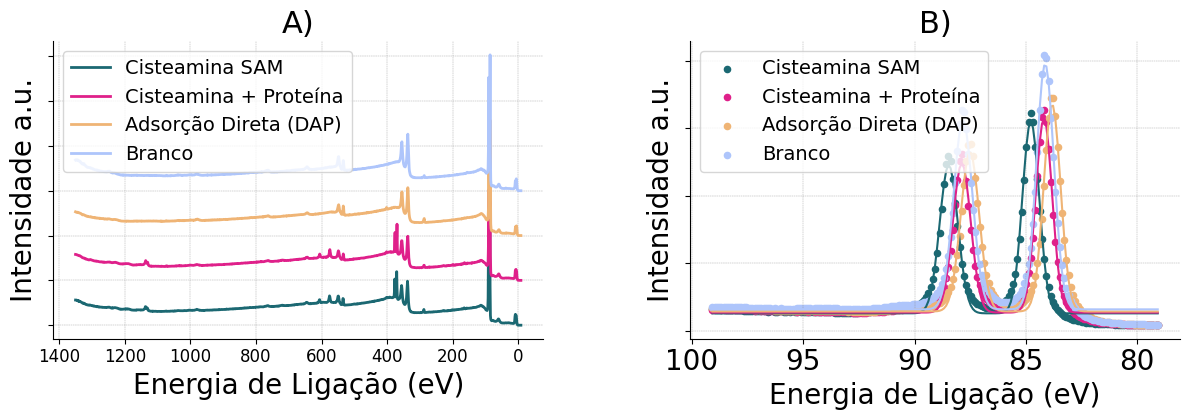

In [4]:
labels = ['Cisteamina SAM', 'Cisteamina + Proteína', 'Adsorção Direta (DAP)', 'Branco']

survey_data = []
# Example usage
for i in range(1,5):
    file_path = f'XPS/{i}/XPS Survey.avg'  # Change this to your .avg file path
    # Example usage
    survey_data.append(read_xps_avg(file_path))

fig, [ax1,ax]  = plt.subplots(1, 2,figsize=(12, 4.3), sharey = False); ax.set_title("B)", fontsize = 22);ax1.set_title("A)", fontsize = 22)

ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax1.yaxis.get_offset_text().set_fontsize(12)

ax1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 16)
ax1.spines[['right', 'top']].set_visible(False)
ax1.invert_xaxis()
ax1.set_xlabel('Energia de Ligação (eV)', fontsize=20)
ax1.set_ylabel('Intensidade a.u.', fontsize=20)
ax1.tick_params(labelsize = 12)
ax1.set_yticklabels([])

x = np.array(list(range(136,136+1360)))
print(x)
x = 1486.680054 - x
print(x)

for i, xps_data in enumerate(survey_data):
    ax1.plot(x, xps_data['Intensity'][-1360:] + i*1e5, color = PALETTE[i], label = labels[i], linewidth = 2)
ax1.legend(fontsize = 14)




labels = ['Cisteamina SAM', 'Cisteamina + Proteína', 'Adsorção Direta (DAP)', 'Branco']

survey_data = []
# Example usage
for i in range(1,5):
    file_path = f'XPS/{i}/Au4f Scan.avg'  # Change this to your .avg file path
    # Example usage
    survey_data.append(read_xps_avg(file_path))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(20)

ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
ax.invert_xaxis()
ax.set_xlabel('Energia de Ligação (eV)', fontsize=20)
ax.set_ylabel('Intensidade a.u.', fontsize=20)
ax.tick_params(labelsize = 20)
ax.set_yticklabels([])

AU_HEIGHTS = []
y = np.array(survey_data[0]['Intensity'][-201:])
x = [1387.600000]
i = 1
while len(y)>len(x):
    x.append(1387.600000 + 0.1*i)
    i+=1
x = 1486.680054 - np.array(x)

for i, xps_data in enumerate(survey_data):
    
    modelo_pico1 = GaussianModel(prefix = 'p1_')
    params_pico1 = modelo_pico1.make_params()
    
    
    params1 = (
        params_pico1)
    
    params1.pretty_print(columns=['value', 'min', 'max', 'vary', 'expr'])
    params1["p1_center"].set(value=83, min=81, max=86)
    params1["p1_sigma"].set(value=1,min = 0.1, max=2)
    params1["p1_amplitude"].set(value=5000, min=1000)
    params1["p1_height"].set(value=140000, min=100, max = 1500000, vary = True)
    
    modelo_pico2 = GaussianModel(prefix = 'p2_')
    params_pico2 = modelo_pico2.make_params()
    
    
    params2 = (
        params_pico2)
    
    params2.pretty_print(columns=['value', 'min', 'max', 'vary', 'expr'])
    params2["p2_center"].set(value=88, min=86, max=89)
    params2["p2_sigma"].set(value=1,min = 0.1, max=3)
    params2["p2_amplitude"].set(value=5000, min=1000)
    params2["p2_height"].set(value=140000, min=100, max = 1500000, vary = True)
    
    
    modelo_reta = LinearModel(prefix = 'l1_')
    params_reta = modelo_reta.make_params()
    params3 = (
        params_reta)
    params3["l1_slope"].set(value=-100, min=-300, max=0)
    params3["l1_intercept"].set(value=40000,min =-60000, max = 800000)
    
    modelo_composto = modelo_pico1 + modelo_pico2 + modelo_reta
    params = (params1 + params2 + params3)
    y = np.array(xps_data['Intensity'][-201:])
    resultado_fit = modelo_composto.fit(y, params, x=x)
    #resultado_fit.plot()
    ax.plot(x, resultado_fit.best_fit,color = PALETTE[i])
    ax.scatter(x, y , color = PALETTE[i], label = labels[i], s = 20)
    
    #print(resultado_fit.fit_report())
    amplitude = resultado_fit.params['p2_amplitude'].value
    sigma = resultado_fit.params['p2_sigma'].value
    area = amplitude * sigma * np.sqrt(2 * np.pi)
    AU_HEIGHTS.append(area)
ax.legend(fontsize = 14)

plt.tight_layout()
fig.subplots_adjust(wspace = 0.3)
plt.savefig('GOLD_XPS.png', dpi = 200, transparent = True)

In [5]:
print(AU_HEIGHTS)

[230397.9047872832, 225058.06454350875, 256079.29458852156, 319001.2985309001]


# Carbon

In [6]:
labels = ['Cysteamine SAM', 'Cysteamine + Protein', 'Protein Drop Casting', 'Blank']

survey_data = []
# Example usage
for i in range(1,5):
    file_path = f'XPS/{i}/C1s Scan.avg'  # Change this to your .avg file path
    # Example usage
    survey_data.append(read_xps_avg(file_path))

fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey = False)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(12)

ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
ax.invert_xaxis()
ax.set_xlabel('Energia de Ligação (eV)', fontsize=16)
ax.set_ylabel('Intensidade a.u.', fontsize=16)
ax.tick_params(labelsize = 12)
ax.set_yticklabels([])

y = np.array(survey_data[0]['Intensity'])
x = [1188.600000]
i = 1
while len(y)>len(x):
    x.append(1188.600000 + 0.1*i)
    i+=1
x = 1486.680054 - np.array(x)

for i, xps_data in enumerate(survey_data):
    y = np.array(xps_data['Intensity'][192:-191])
    ax.plot(x, y , color = PALETTE[i], label = labels[i], linewidth = 2)
ax.legend(fontsize = 14)


# Nitrogen

In [7]:
labels = ['Cisteamina SAM', 'Cisteamina + Proteína', 'Adsorção Direta (DAP)', 'Branco']

survey_data = []
# Example usage
for i in range(1,5):
    file_path = f'XPS/{i}/N1s Scan.avg'  # Change this to your .avg file path
    # Example usage
    survey_data.append(read_xps_avg(file_path))

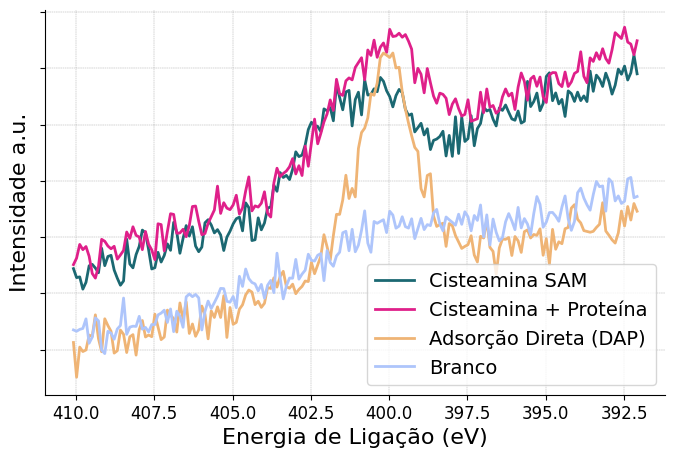

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey = False)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(12)

ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
ax.invert_xaxis()
ax.set_xlabel('Energia de Ligação (eV)', fontsize=16)
ax.set_ylabel('Intensidade a.u.', fontsize=16)
ax.tick_params(labelsize = 12)
ax.set_yticklabels([])


y = np.array(survey_data[0]['Intensity'][-181:])
x = [1076.600000]
i = 1
while len(y)>len(x):
    x.append(1076.600000 + 0.1*i)
    i+=1
x = 1486.680054 - np.array(x)

for i, xps_data in enumerate(survey_data):
    y = np.array(xps_data['Intensity'][-181:])
    ax.plot(x, y , color = PALETTE[i], label = labels[i], linewidth = 2)
ax.legend(fontsize = 14)

Name             Value      Min      Max     Vary     Expr
p1_amplitude         1     -inf      inf     True     None
p1_center            0     -inf      inf     True     None
p1_fwhm          2.355     -inf      inf    False 2.3548200*p1_sigma
p1_height       0.3989     -inf      inf    False 0.3989423*p1_amplitude/max(1e-15, p1_sigma)
p1_sigma             1        0      inf     True     None
Name             Value      Min      Max     Vary     Expr
p1_amplitude         1     -inf      inf     True     None
p1_center            0     -inf      inf     True     None
p1_fwhm          2.355     -inf      inf    False 2.3548200*p1_sigma
p1_height       0.3989     -inf      inf    False 0.3989423*p1_amplitude/max(1e-15, p1_sigma)
p1_sigma             1        0      inf     True     None
Name             Value      Min      Max     Vary     Expr
p1_amplitude         1     -inf      inf     True     None
p1_center            0     -inf      inf     True     None
p1_fwhm          2.355   

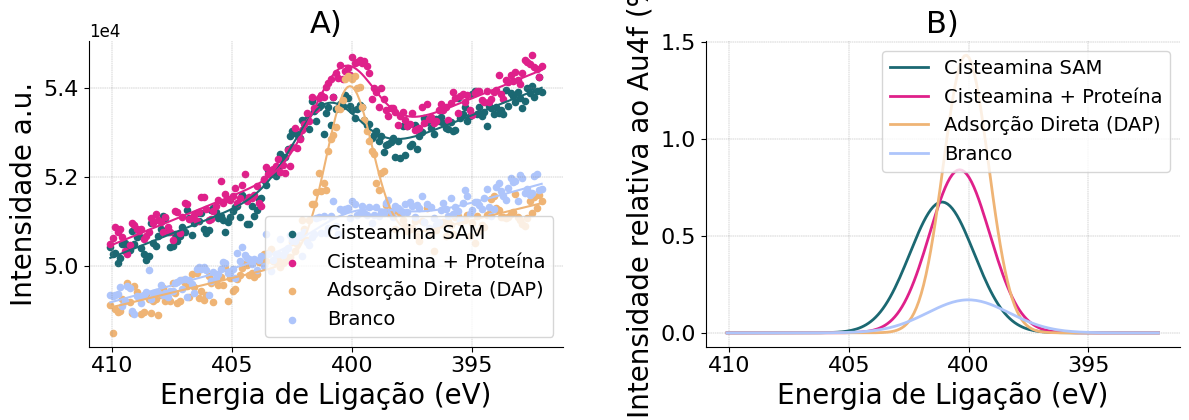

In [9]:


fig, [ax, ax1] = plt.subplots(1, 2, figsize=(12, 4.3), sharey = False); ax.set_title("A)",fontsize = 22);ax1.set_title("B)",fontsize = 22)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(12)

ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
ax.invert_xaxis()
ax.set_xlabel('Energia de Ligação (eV)', fontsize=20)
ax.set_ylabel('Intensidade a.u.', fontsize=20)
ax.tick_params(labelsize = 16)
#ax.set_yticklabels([])

ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax1.yaxis.get_offset_text().set_fontsize(16)

ax1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#a1x.legend(fontsize = 16)
ax1.spines[['right', 'top']].set_visible(False)
ax1.invert_xaxis()
ax1.set_xlabel('Energia de Ligação (eV)', fontsize=20)
ax1.set_ylabel('Intensidade relativa ao Au4f (%)', fontsize=20)
ax1.tick_params(labelsize = 16)
#ax1.set_yticklabels([])


y = np.array(survey_data[0]['Intensity'][-181:])
x = [1076.600000]
i = 1
while len(y)>len(x):
    x.append(1076.600000 + 0.1*i)
    i+=1
x = 1486.680054 - np.array(x)

for i, xps_data in enumerate(survey_data):
    modelo_pico1 = GaussianModel(prefix = 'p1_')
    params_pico1 = modelo_pico1.make_params()
    
    
    params1 = (
        params_pico1)
    
    params1.pretty_print(columns=['value', 'min', 'max', 'vary', 'expr'])
    params1["p1_center"].set(value=400, min=284, max=1000)
    params1["p1_sigma"].set(value=1,min = 0.5, max=2)
    params1["p1_amplitude"].set(value=5000, min=1000)
    params1["p1_height"].set(value=7000, min=1000, max = 8000, vary = True)
    
    modelo_reta = LinearModel(prefix = 'l1_')
    params_reta = modelo_reta.make_params()
    params2 = (
        params_reta)
    params2["l1_slope"].set(value=-100, min=-300, max=0)
    params2["l1_intercept"].set(value=40000,min =-1000, max = 800000)
    
    modelo_composto = modelo_pico1 + modelo_reta
    params = (params1 + params2)
    y = np.array(xps_data['Intensity'][-181:])
    resultado_fit = modelo_composto.fit(y, params, x=x)
    #print(resultado_fit.fit_report())

    #resultado_fit.plot()
    a = resultado_fit.params['l1_slope'].value
    b = resultado_fit.params['l1_intercept'].value
    ax.plot(x, resultado_fit.best_fit,color = PALETTE[i])
    ax.scatter(x, y , color = PALETTE[i], label = labels[i], s = 20) #linewidth = 2)
    ax1.plot(x, 100*(resultado_fit.best_fit -x*a - b)/AU_HEIGHTS[i], color = PALETTE[i], label = labels[i], linewidth = 2)
ax.legend(fontsize = 14)
ax1.legend(fontsize = 14)

plt.tight_layout()
fig.subplots_adjust(wspace = 0.3)
plt.savefig('NITROGEN_XPS.png', dpi = 200, transparent = True)

# SULFUR

In [10]:
labels = ['Cisteamina SAM', 'Cisteamina + Proteína', 'Adsorção Direta (DAP)', 'Branco']

survey_data = []
# Example usage
for i in range(1,5):
    file_path = f'XPS/{i}/S2p Scan.avg'  # Change this to your .avg file path
    # Example usage
    survey_data.append(read_xps_avg(file_path))

Name             Value      Min      Max     Vary     Expr
p1_amplitude         1     -inf      inf     True     None
p1_center            0     -inf      inf     True     None
p1_fwhm          2.355     -inf      inf    False 2.3548200*p1_sigma
p1_height       0.3989     -inf      inf    False 0.3989423*p1_amplitude/max(1e-15, p1_sigma)
p1_sigma             1        0      inf     True     None
Name             Value      Min      Max     Vary     Expr
p1_amplitude         1     -inf      inf     True     None
p1_center            0     -inf      inf     True     None
p1_fwhm          2.355     -inf      inf    False 2.3548200*p1_sigma
p1_height       0.3989     -inf      inf    False 0.3989423*p1_amplitude/max(1e-15, p1_sigma)
p1_sigma             1        0      inf     True     None
Name             Value      Min      Max     Vary     Expr
p1_amplitude         1     -inf      inf     True     None
p1_center            0     -inf      inf     True     None
p1_fwhm          2.355   

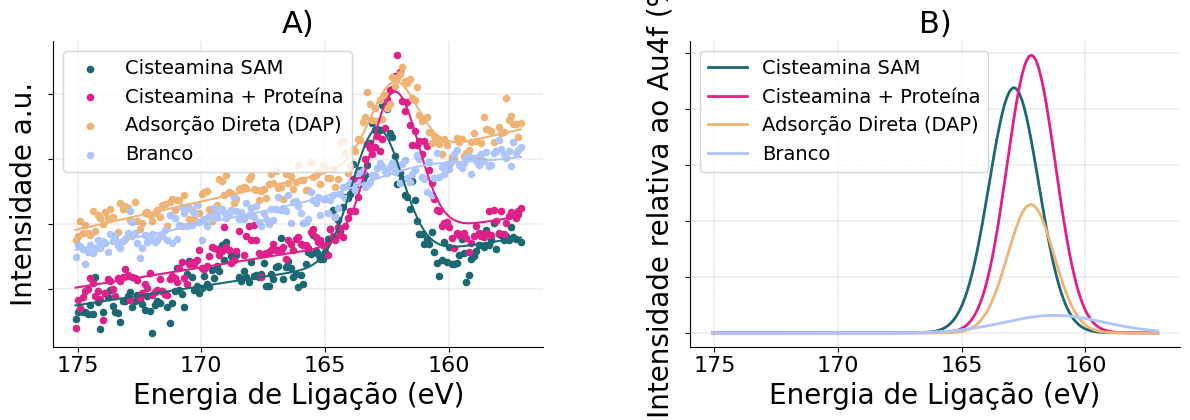

In [11]:
fig, [ax, ax1] = plt.subplots(1, 2, figsize=(12, 4.3), sharey = False); ax.set_title("A)",fontsize = 22);ax1.set_title("B)",fontsize = 22)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(12)

ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
ax.invert_xaxis()
ax.set_xlabel('Energia de Ligação (eV)', fontsize=20)
ax.set_ylabel('Intensidade a.u.', fontsize=20)
ax.tick_params(labelsize = 16)
ax.set_yticklabels([])

ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax1.yaxis.get_offset_text().set_fontsize(16)

ax1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#a1x.legend(fontsize = 16)
ax1.spines[['right', 'top']].set_visible(False)
ax1.invert_xaxis()
ax1.set_xlabel('Energia de Ligação (eV)', fontsize=20)
ax1.set_ylabel('Intensidade relativa ao Au4f (%)', fontsize=20)
ax1.tick_params(labelsize = 16)
ax1.set_yticklabels([])


y = np.array(survey_data[0]['Intensity'][-181:])
x = [1311.600000]
i = 1
while len(y)>len(x):
    x.append(1311.600000 + 0.1*i)
    i+=1
x = 1486.680054 - np.array(x)

for i, xps_data in enumerate(survey_data):
    modelo_pico1 = GaussianModel(prefix = 'p1_')
    params_pico1 = modelo_pico1.make_params()
    
    
    params1 = (
        params_pico1)
    
    params1.pretty_print(columns=['value', 'min', 'max', 'vary', 'expr'])
    params1["p1_center"].set(value=160, min=158, max=165)
    params1["p1_sigma"].set(value=1,min = 0.5, max=2)
    params1["p1_amplitude"].set(value=5000, min=1000)
    params1["p1_height"].set(value=7000, min=1000, max = 8000, vary = True)
    
    modelo_reta = LinearModel(prefix = 'l1_')
    params_reta = modelo_reta.make_params()
    params2 = (
        params_reta)
    params2["l1_slope"].set(value=-100, min=-300, max=0)
    params2["l1_intercept"].set(value=40000,min =-1000, max = 800000)
    
    modelo_composto = modelo_pico1 + modelo_reta
    params = (params1 + params2)
    y = np.array(xps_data['Intensity'][-181:])
    resultado_fit = modelo_composto.fit(y, params, x=x)
    #print(resultado_fit.fit_report())

    #resultado_fit.plot()
    a = resultado_fit.params['l1_slope'].value
    b = resultado_fit.params['l1_intercept'].value
    ax.plot(x, resultado_fit.best_fit,color = PALETTE[i])
    ax.scatter(x, y , color = PALETTE[i], label = labels[i], s = 20) #linewidth = 2)
    ax1.plot(x, 100*(resultado_fit.best_fit -x*a - b)/AU_HEIGHTS[i], color = PALETTE[i], label = labels[i], linewidth = 2)
ax.legend(fontsize = 14)
ax1.legend(fontsize = 14)

plt.tight_layout()
fig.subplots_adjust(wspace = 0.3)
plt.savefig('SULFUR_XPS.png', dpi = 200, transparent = True)